<a href="https://colab.research.google.com/github/Ahmed-Beltagy/HeartDisease_Kaggle/blob/main/HeartDisease_KaggleCompetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from numpy import mean
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [102]:
test_data = pd.read_csv("/content/test.csv")

In [2]:
data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")
data.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [3]:
data["age"] = round(data["age"])
data["chest"] = round(data["chest"])

In [4]:
data.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.0,0,4.0,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,54.0,1,2.0,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,50.0,1,4.0,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,59.0,1,4.0,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.0,1,2.0,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


# Get General Information about The Dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

In [6]:
data.shape

(600000, 15)

In [7]:
data.describe()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,299999.500000,54.425282,0.677447,3.171207,131.340485,249.592420,0.150757,1.020148,149.592069,0.333502,1.051391,1.596033,0.681303,4.711378,0.444185
std,173205.225094,9.090470,0.467454,0.958954,17.842450,51.699976,0.357812,0.994204,23.072593,0.471464,1.144288,0.629821,0.950669,1.934766,0.496875
min,0.000000,26.000000,0.000000,-1.000000,82.918527,98.326263,0.000000,0.000000,61.844168,0.000000,-0.806788,1.000000,0.000000,3.000000,0.000000
25%,149999.750000,48.000000,0.000000,3.000000,119.924094,216.475964,0.000000,0.000000,135.704237,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,299999.500000,55.000000,1.000000,3.000000,129.727941,244.233699,0.000000,2.000000,153.224828,0.000000,0.811101,2.000000,0.000000,3.000000,0.000000
75%,449999.250000,61.000000,1.000000,4.000000,139.915216,274.345453,0.000000,2.000000,165.165497,1.000000,1.674081,2.000000,1.000000,7.000000,1.000000
max,599999.000000,80.000000,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.803372,3.000000,3.000000,7.000000,1.000000


In [8]:
data.nunique(axis=0)

ID                                      600000
age                                         55
sex                                          2
chest                                        6
resting_blood_pressure                  596241
serum_cholestoral                       598797
fasting_blood_sugar                          2
resting_electrocardiographic_results         3
maximum_heart_rate_achieved             597583
exercise_induced_angina                      2
oldpeak                                 384255
slope                                        3
number_of_major_vessels                      4
thal                                         3
class                                        2
dtype: int64

# Checking The Balance of the Target

In [9]:
data["class"].value_counts()

0    333489
1    266511
Name: class, dtype: int64

<h1 style="color: teal"><center>Cholestrol</center></h1>
<h2>ranges</h2>
<hr>
<h3>Normal: less than 200 mg/dl</h3>
<br>
<br>
<h3>BorderLine High: 200 to 239 mg/dl</h3>
<br>
<br>
<h3>High: 240 mg/dl or above</h3>
<hr>

<h1 style="color: teal"><center>fasting blood sugar</center></h1>
<h2>A blood test done to measure the basal sugar levels of blood, usually done in the morning after long hours of fast at night.</h2>
<hr>

<h1 style="color: teal"><center>exercise_induced_angina</center></h1>
<h2>Chest pain that comes on with exercise, stress, or other things that make the heart work harder. It is a symptom of coronary artery disease, which is caused by cholesterol-clogged coronary arteries. It can be triggered by a cold environment, vasospasm, or heavy meal. It usually resolves by stopping exercise or with nitroglycerin. It can be fatal if not appropriately managed.</h2>
<hr>

<h1 style="color: teal"><center>OldPeak</center></h1>
<h2>ST segment depression less than 0.5 mm is accepted in all leads. ST segment depression 0.5 mm or more is considered pathological. According to some expert consensus documents, any segment of depression in V2–V3 should be considered abnormal.</h2>
<hr>

# Checking NULL Values

In [10]:
data.isnull().sum()

ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

# Dropping Unnecessary Columns

In [11]:
data = data.drop(["ID"], axis=1)
test_data = test_data.drop(['ID'], axis=1)

In [12]:
data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49.0,0,4.0,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,54.0,1,2.0,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,50.0,1,4.0,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,59.0,1,4.0,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51.0,1,2.0,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [62]:
data["thal_norm"] = data["thal"]==3
data["thal_fix_def"] = data["thal"]==6
data["thal_rev_def"] = data["thal"]==7

test_data["thal_norm"] = test_data["thal"]==3
test_data["thal_fix_def"] = test_data["thal"]==6
test_data["thal_rev_def"] = test_data["thal"]==7

In [63]:
data['thal_norm'] = data['thal_norm'].astype(int)
data['thal_fix_def'] = data['thal_fix_def'].astype(int)
data['thal_rev_def'] = data['thal_rev_def'].astype(int)


test_data['thal_norm'] = test_data['thal_norm'].astype(int)
test_data['thal_fix_def'] = test_data['thal_fix_def'].astype(int)
test_data['thal_rev_def'] = test_data['thal_rev_def'].astype(int)

In [65]:
data = data.drop(["thal"], axis=1)
test_data = test_data.drop(["thal"], axis=1)

In [16]:
data = pd.get_dummies(data, prefix=["number_of_major_vessels", "exercise_induced_angina", "resting_electrocardiographic_results", "fasting_blood_sugar"],
                            columns=["number_of_major_vessels", "exercise_induced_angina", "resting_electrocardiographic_results", "fasting_blood_sugar"],
                            drop_first=True)

In [66]:
test_data = pd.get_dummies(test_data, prefix=["number_of_major_vessels", "exercise_induced_angina", "resting_electrocardiographic_results", "fasting_blood_sugar"],
                            columns=["number_of_major_vessels", "exercise_induced_angina", "resting_electrocardiographic_results", "fasting_blood_sugar"],
                            drop_first=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     600000 non-null  float64
 1   sex                                     600000 non-null  int64  
 2   chest                                   600000 non-null  float64
 3   resting_blood_pressure                  600000 non-null  float64
 4   serum_cholestoral                       600000 non-null  float64
 5   maximum_heart_rate_achieved             600000 non-null  float64
 6   oldpeak                                 600000 non-null  float64
 7   slope                                   600000 non-null  int64  
 8   class                                   600000 non-null  int64  
 9   thal_norm                               600000 non-null  int64  
 10  thal_fix_def                            6000

# Putting back the Target column at the end

In [18]:
data.columns

Index(['age', 'sex', 'chest', 'resting_blood_pressure', 'serum_cholestoral',
       'maximum_heart_rate_achieved', 'oldpeak', 'slope', 'class', 'thal_norm',
       'thal_fix_def', 'thal_rev_def', 'number_of_major_vessels_1',
       'number_of_major_vessels_2', 'number_of_major_vessels_3',
       'exercise_induced_angina_1', 'resting_electrocardiographic_results_1',
       'resting_electrocardiographic_results_2', 'fasting_blood_sugar_1'],
      dtype='object')

In [68]:
data.shape

(600000, 17)

In [20]:
col = data.pop('class')
data.insert(18,'class', col)

In [21]:
data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,slope,thal_norm,thal_fix_def,thal_rev_def,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3,exercise_induced_angina_1,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,fasting_blood_sugar_1,class
0,49.0,0,4.0,162.996167,181.108682,148.227858,0.944547,2,1,0,0,0,0,0,1,0,0,0,1
1,54.0,1,2.0,130.233730,276.474630,152.917139,0.119070,2,1,0,0,0,0,0,0,0,1,0,0
2,50.0,1,4.0,146.999012,223.300517,102.352090,1.616747,2,0,0,1,0,1,0,1,0,1,1,1
3,59.0,1,4.0,112.369143,187.245501,158.164750,0.000000,1,0,0,1,1,0,0,1,0,0,0,1
4,51.0,1,2.0,138.032047,238.482868,172.540828,1.150464,1,1,0,0,1,0,0,0,0,0,0,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 19 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     600000 non-null  float64
 1   sex                                     600000 non-null  int64  
 2   chest                                   600000 non-null  float64
 3   resting_blood_pressure                  600000 non-null  float64
 4   serum_cholestoral                       600000 non-null  float64
 5   maximum_heart_rate_achieved             600000 non-null  float64
 6   oldpeak                                 600000 non-null  float64
 7   slope                                   600000 non-null  int64  
 8   thal_norm                               600000 non-null  int64  
 9   thal_fix_def                            600000 non-null  int64  
 10  thal_rev_def                            6000

<h1 style="color:green"><center>EDA</center></h1>

<Axes: >

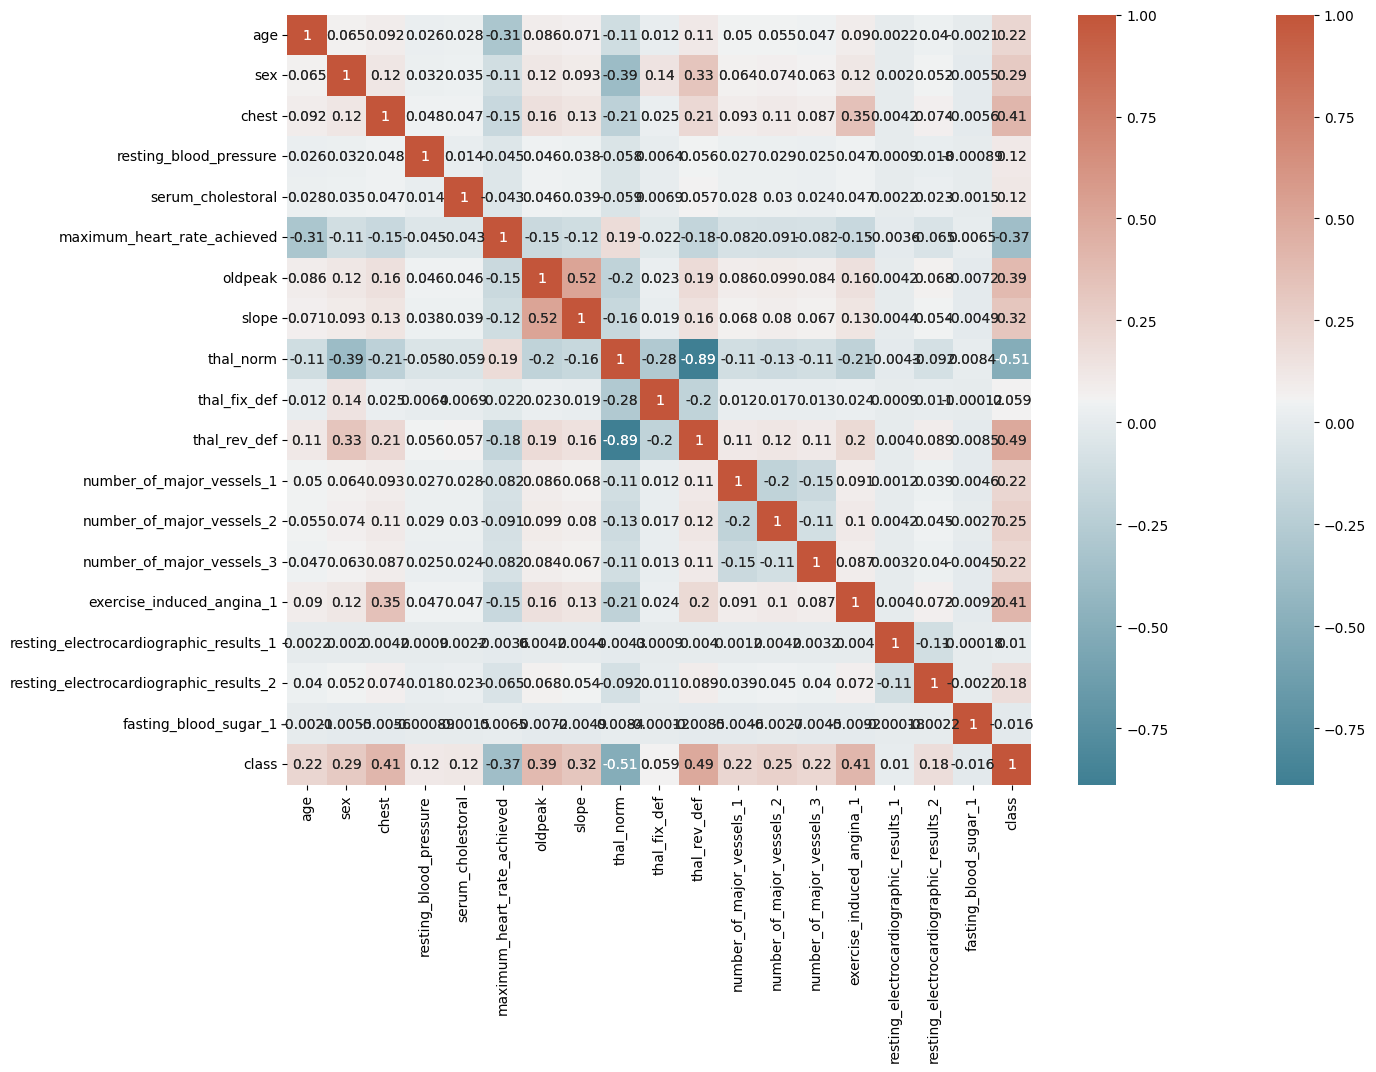

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

<p style="font-weight: bold">we see a negative correlation between exercise induced angina (exang) & our predictor. This makes sense because when you excercise, your heart requires more blood, but narrowed arteries slow down blood flow.</p>

In [24]:
data.corr()["class"].abs().sort_values(ascending=False)[1:]

thal_norm                                 0.509960
thal_rev_def                              0.492488
chest                                     0.414930
exercise_induced_angina_1                 0.411014
oldpeak                                   0.392788
maximum_heart_rate_achieved               0.368760
slope                                     0.316084
sex                                       0.292998
number_of_major_vessels_2                 0.251207
age                                       0.221936
number_of_major_vessels_1                 0.220461
number_of_major_vessels_3                 0.216604
resting_electrocardiographic_results_2    0.178000
serum_cholestoral                         0.117765
resting_blood_pressure                    0.115044
thal_fix_def                              0.058675
fasting_blood_sugar_1                     0.015911
resting_electrocardiographic_results_1    0.010095
Name: class, dtype: float64

<p style= "font-weight: bold"> from the above correlations we can consider only the features which have a correlation graeter than 0.2 with the target and see what will happen</p>

In [25]:
data = data.drop([ 
                  "resting_blood_pressure", "thal_fix_def"], axis=1)

In [105]:
test_data = test_data.drop([ 
                  "resting_blood_pressure", "thal_fix_def"], axis=1)

In [26]:
data.head()

,age,sex,chest,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,slope,thal_norm,thal_rev_def,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3,exercise_induced_angina_1,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,fasting_blood_sugar_1,class
0,49.0,0,4.0,181.108682,148.227858,0.944547,2,1,0,0,0,0,1,0,0,0,1
1,54.0,1,2.0,276.474630,152.917139,0.119070,2,1,0,0,0,0,0,0,1,0,0
2,50.0,1,4.0,223.300517,102.352090,1.616747,2,0,1,0,1,0,1,0,1,1,1
3,59.0,1,4.0,187.245501,158.164750,0.000000,1,0,1,1,0,0,1,0,0,0,1
4,51.0,1,2.0,238.482868,172.540828,1.150464,1,1,0,1,0,0,0,0,0,0,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   age                                     600000 non-null  float64
 1   sex                                     600000 non-null  int64  
 2   chest                                   600000 non-null  float64
 3   serum_cholestoral                       600000 non-null  float64
 4   maximum_heart_rate_achieved             600000 non-null  float64
 5   oldpeak                                 600000 non-null  float64
 6   slope                                   600000 non-null  int64  
 7   thal_norm                               600000 non-null  int64  
 8   thal_rev_def                            600000 non-null  int64  
 9   number_of_major_vessels_1               600000 non-null  uint8  
 10  number_of_major_vessels_2               6000

Text(36.804208333333335, 0.5, 'ST depression')

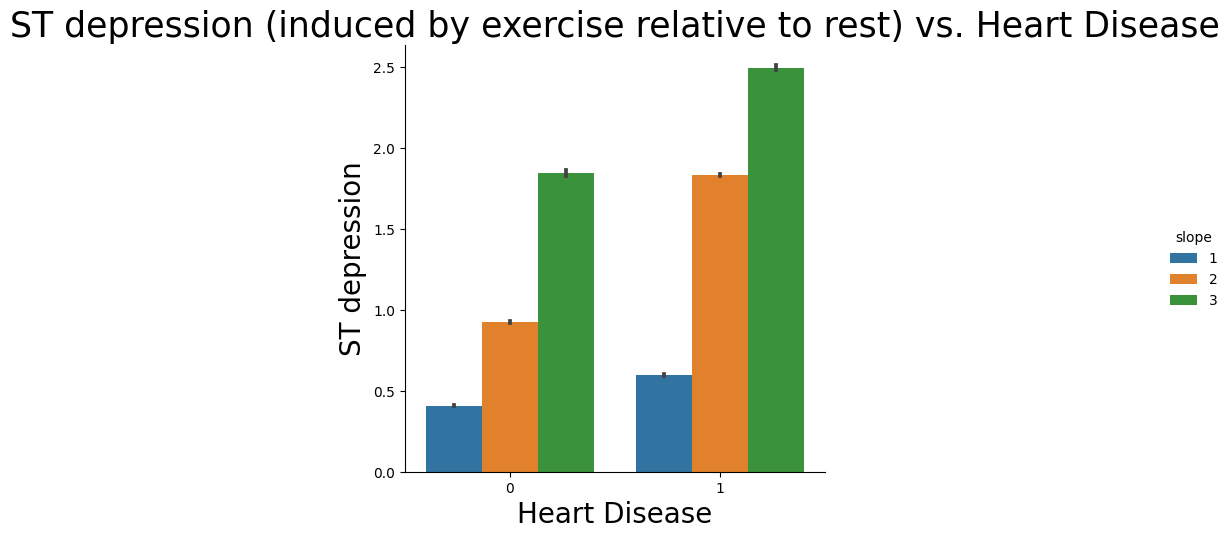

In [28]:
sns.catplot(x="class", y="oldpeak", hue="slope", kind="bar", data=data);
plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

<p style="font-weight: bold">The “slope” hue, refers to the peak exercise ST segment, with values: 1: downsloping , 2: flat , 3: upsloping). Both positive & negative heart disease patients exhibit equal distributions of the 3 slope categories.</p>

<hr>

<p style="font-weight: bold">Applying Min/Max scaling for maximum_heart_rate_achieved column.</p>

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['maximum_heart_rate_achieved'] = scaler.fit_transform(data[['maximum_heart_rate_achieved']])
data['oldpeak'] = scaler.fit_transform(data[['oldpeak']])
data['serum_cholestoral'] = scaler.fit_transform(data[['serum_cholestoral']])




data.head()

,age,sex,chest,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,slope,thal_norm,thal_rev_def,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3,exercise_induced_angina_1,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,fasting_blood_sugar_1,class
0,49.0,0,4.0,0.192773,0.588080,0.230131,2,1,0,0,0,0,1,0,0,0,1
1,54.0,1,2.0,0.414849,0.620004,0.121661,2,1,0,0,0,0,0,0,1,0,0
2,50.0,1,4.0,0.291024,0.275769,0.318460,2,0,1,0,1,0,1,0,1,1,1
3,59.0,1,4.0,0.207064,0.655728,0.106015,1,0,1,1,0,0,1,0,0,0,1
4,51.0,1,2.0,0.326379,0.753597,0.257189,1,1,0,1,0,0,0,0,0,0,0


In [100]:
scaler = MinMaxScaler()
test_data['maximum_heart_rate_achieved'] = scaler.fit_transform(test_data[['maximum_heart_rate_achieved']])
test_data['oldpeak'] = scaler.fit_transform(test_data[['oldpeak']])
test_data['serum_cholestoral'] = scaler.fit_transform(test_data[['serum_cholestoral']])


<hr>

<h1 style="color:teal"><center> Modeling and Predicting </center></h1>

<h3><center><font color=purple> 
    Seperate the label from our features to split our data to tran/test </font></center></h3>

In [30]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [32]:
# funtion to get accuracy
def get_score(y_temp_l):
    y_pred_l = []
    for i in y_temp_l:
        if i > 0.5:
            y_pred_l.append(1)
        else:
            y_pred_l.append(0)
    print(accuracy_score(y_pred_l,y_test)*100)

<h3><font color=teal> 
    Logistic Regression </font></h3>

In [33]:
data.isnull().sum()

age                                       0
sex                                       0
chest                                     0
serum_cholestoral                         0
maximum_heart_rate_achieved               0
oldpeak                                   0
slope                                     0
thal_norm                                 0
thal_rev_def                              0
number_of_major_vessels_1                 0
number_of_major_vessels_2                 0
number_of_major_vessels_3                 0
exercise_induced_angina_1                 0
resting_electrocardiographic_results_1    0
resting_electrocardiographic_results_2    0
fasting_blood_sugar_1                     0
class                                     0
dtype: int64

In [34]:
logreg = LogisticRegression(solver='lbfgs', max_iter=200) 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     66810
           1       0.87      0.85      0.86     53190

    accuracy                           0.88    120000
   macro avg       0.88      0.88      0.88    120000
weighted avg       0.88      0.88      0.88    120000



<h3><font color=teal> 
    KNeighborsClassifier</font></h3>

In [35]:
knnClassifier = KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(X_train,y_train);
y_pred2 = knnClassifier.predict(X_test)
print(classification_report(y_test, y_pred2))

predictions = knnClassifier.predict_proba(X_test)
predictions = [i[1] for i in predictions]
predictions_c = predictions
get_score(predictions)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     66810
           1       0.86      0.84      0.85     53190

    accuracy                           0.87    120000
   macro avg       0.87      0.87      0.87    120000
weighted avg       0.87      0.87      0.87    120000

86.97333333333333


In [36]:
# kn_train = knnClassifier.score(X_train,y_train)
# kn_test = knnClassifier.score(X_test,y_test)
# print(kn_train)
# print(kn_test)

<h3><font color=teal> 
    Random Forests</font></h3>

In [37]:
def fit_random_forest_classifier(X_train, y_train):
    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=200, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    print(classification_report(y_test, y_preds))


    predictions = clf.predict_proba(X_test)
    predictions = [i[1] for i in predictions]
    predictions_c = predictions
    get_score(predictions)

fit_random_forest_classifier(X_train, y_train)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     66810
           1       0.89      0.87      0.88     53190

    accuracy                           0.89    120000
   macro avg       0.89      0.89      0.89    120000
weighted avg       0.89      0.89      0.89    120000

89.4625


<h3><font color=teal> 
    GaussianNB</font></h3>

In [38]:
%%time

model4 = GaussianNB() # get instance of model
model4.fit(X_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     66810
           1       0.83      0.84      0.84     53190

    accuracy                           0.85    120000
   macro avg       0.85      0.85      0.85    120000
weighted avg       0.85      0.85      0.85    120000

CPU times: user 328 ms, sys: 35.9 ms, total: 364 ms
Wall time: 362 ms


<h3><font color=teal> 
    Decission Trees</font></h3>

In [39]:
%%time

from sklearn.tree import DecisionTreeClassifier
model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(X_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(X_test) # get y predictions
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     66810
           1       0.83      0.83      0.83     53190

    accuracy                           0.85    120000
   macro avg       0.85      0.85      0.85    120000
weighted avg       0.85      0.85      0.85    120000

CPU times: user 4.4 s, sys: 9.06 ms, total: 4.4 s
Wall time: 4.39 s


<h3><font color=teal> 
    Lightgbm</font></h3>

In [40]:
%%time

import lightgbm as lgb
clf_l = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective= 'binary',
          nthread= 4, # Updated from nthread
          metric = 'binary_error',
         seed  = 47,
        depth =  5)
clf_l.fit(X_train, y_train)
y_preds = clf_l.predict(X_test)
print(classification_report(y_test, y_preds))

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     66810
           1       0.89      0.88      0.89     53190

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

CPU times: user 10.5 s, sys: 180 ms, total: 10.7 s
Wall time: 7.32 s


<h3><font color=teal> 
    XGBoost</font></h3>

In [41]:
%%time
import xgboost as xgb
from xgboost import XGBClassifier

model7 = xgb.XGBClassifier(random_state=1)
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)
print(classification_report(y_test, y_pred7))

predictions = model7.predict_proba(X_test)
predictions = [i[1] for i in predictions]
predictions_c = predictions
get_score(predictions)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     66810
           1       0.89      0.88      0.89     53190

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

90.07083333333334
CPU times: user 1min 59s, sys: 281 ms, total: 1min 59s
Wall time: 1min 6s


<h3><font color=teal> 
    catboost</font></h3>

In [47]:
%%time

from catboost import CatBoostClassifier
clf_c = CatBoostClassifier(iterations=500, learning_rate=0.07, verbose=False, 
                           depth =  5,loss_function='Logloss', thread_count = 4,
                           eval_metric='Accuracy')

clf_c.fit(X_train, y_train)
y_preds = clf_l.predict(X_test)
print(classification_report(y_test, y_preds))

predictions = clf_c.predict_proba(X_test)
predictions = [i[1] for i in predictions]
predictions_c = predictions
get_score(predictions)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     66810
           1       0.89      0.88      0.89     53190

    accuracy                           0.90    120000
   macro avg       0.90      0.90      0.90    120000
weighted avg       0.90      0.90      0.90    120000

90.19083333333333
CPU times: user 1min 25s, sys: 1.21 s, total: 1min 26s
Wall time: 1min 5s


<h3><font color=teal> 
    Cross validate best models</font></h3>

In [43]:
from sklearn.model_selection import cross_val_predict,cross_val_score, KFold,StratifiedKFold

kfold = KFold(n_splits=5)

feature_col = [col for col in data.columns if col != 'class']

# fitting lightgbm
results = cross_val_score(lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective= 'binary',
          nthread= 4, # Updated from nthread
          metric = 'binary_error',
         seed  = 47), data[feature_col],data['class'].values, cv=kfold)

print(results)
print(np.mean(results)*100)
print(np.std(results))

[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[0.902225   0.90208333 0.90149167 0.90106667 0.90120833]
90.16149999999999
0.000463183428987814


In [48]:
results = cross_val_score(xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
                          , data[feature_col],data['class'].values, cv=kfold)

print(results)
print(np.mean(results)*100)
print(np.std(results))

[0.90286667 0.90228333 0.90190833 0.90141667 0.90161667]
90.20183333333334
0.0005148462553682342


In [49]:
results = cross_val_score(CatBoostClassifier(iterations=500, learning_rate=0.1, verbose=False, depth =  8,loss_function='Logloss')
                          , data[feature_col],data['class'].values, cv=kfold)

print(results)
print(np.mean(results)*100)
print(np.std(results))

[0.90340833 0.902775   0.90211667 0.90186667 0.901975  ]
90.24283333333332
0.0005828712455499045


In [ ]:
predictions_x = model7.predict_proba(test_data)
predictions_x = [i[1] for i in predictions_x]

In [109]:
predictions_l = clf_l.predict_proba(test_data)
predictions_l = [i[1] for i in predictions_l]

In [107]:
predictions_c = clf_c.predict_proba(test_data)
predictions_c = [i[1] for i in predictions_c]

In [112]:
sub = pd.read_csv("/content/sample_submission.csv", header=0)


p = []

for i in predictions_x:
    if i > 0.5:
        p.append(1)
    else:
        p.append(0)
                
sub['class'] = p
sub.to_csv("submission_x.csv",index=False)